<a href="https://colab.research.google.com/github/rkmaccha/myLearningNotes/blob/main/Normalisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Normalisation 
Normalization in machine learning is the process of translating data into the range [0, 1] (or any other range) or simply transforming data onto the unit sphere.

> MinMax Scaling <br>
> Mean Normalisation <br>
> MaxAbs Scaling <br>
> Robust Scaling

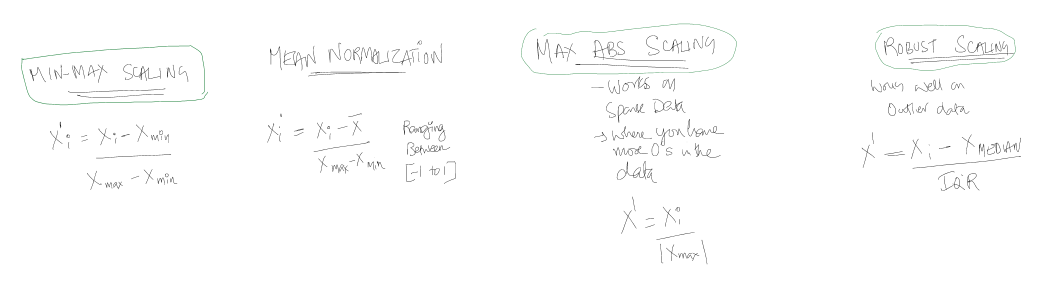

Dataset :  https://archive.ics.uci.edu/ml/datasets/wine

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

In [15]:
data =  datasets.load_wine()

In [16]:
data.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [17]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [18]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [19]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [20]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [22]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [23]:
df['target'] = data.target

In [24]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [25]:
df['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [26]:
df.shape

(178, 14)

Data to be used for Normalisation Workshop : <br>
alcohol	- malic_acid - target

In [30]:
df = df[['target','alcohol','malic_acid']]

In [31]:
df.head()

,target,alcohol,malic_acid
0,0,14.23,1.71
1,0,13.20,1.78
2,0,13.16,2.36
3,0,14.37,1.95
4,0,13.24,2.59


In [32]:
X = df.drop(columns=['target'],axis=1)

In [33]:
X.head()

,alcohol,malic_acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59


In [34]:
y = df['target']

In [35]:
y.shape

(178,)

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)

In [37]:
from sklearn.preprocessing import MinMaxScaler
MMscaler = MinMaxScaler()

In [39]:
MMscaler.fit(X_train)

X_train_normalised = MMscaler.transform(X_train)
X_test_normalised = MMscaler.transform(X_test)

The trained data need to be converted back to Pandas Dataframe from numpy arrays

In [41]:
X_train_normalised = pd.DataFrame(X_train_normalised, columns=X_train.columns)
X_test_normalised = pd.DataFrame(X_test_normalised, columns=X_train.columns)

In [42]:
np.round(X_train.describe(),1)

,alcohol,malic_acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [43]:
np.round(X_train_normalised.describe(),1)

,alcohol,malic_acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


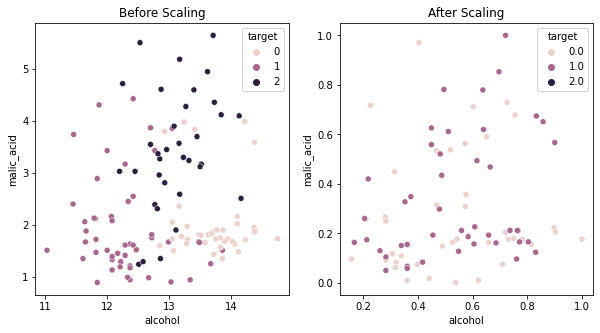

In [64]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
#=======================================================
axes[0].set_title("Before Scaling")
sns.scatterplot(X_train['alcohol'],X_train['malic_acid'],hue=y_train,ax=axes[0],cmap='bwr_r')
#axes[0].scatter(X_train['alcohol'],X_train['malic_acid'])
#=======================================================
axes[1].set_title("After Scaling")
#axes[1].scatter(X_train_normalised['alcohol'],X_train_normalised['malic_acid'],color= 'red')
sns.scatterplot(X_train_normalised['alcohol'],X_train_normalised['malic_acid'],hue=y_train,ax=axes[1],cmap='bwr_r')
#=======================================================
plt.show()

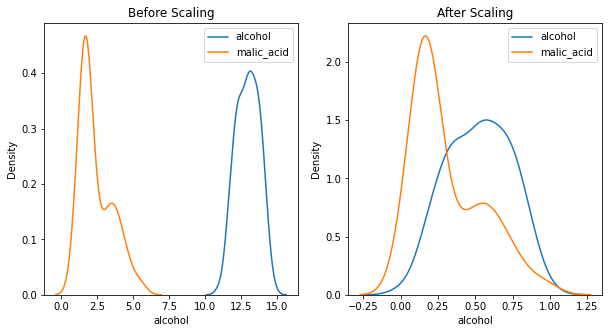

In [48]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
#=======================================================
axes[0].set_title("Before Scaling")
sns.kdeplot(X_train['alcohol'],ax=axes[0])
sns.kdeplot(X_train['malic_acid'],ax=axes[0])
axes[0].legend(['alcohol',"malic_acid"])
#=======================================================
axes[1].set_title("After Scaling")
sns.kdeplot(X_train_normalised['alcohol'],ax=axes[1])
sns.kdeplot(X_train_Scaled['malic_acid'],ax=axes[1])
axes[1].legend(['alcohol',"malic_acid"])
#=======================================================

plt.show()